<a href="https://colab.research.google.com/github/shreyansh273/Football-Scouting/blob/main/Player_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
files = files.upload()

Saving players_value.csv to players_value.csv


In [3]:
from google.colab import files
files = files.upload()

Saving all_players_stats.csv to all_players_stats.csv


In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [168]:
player_stats = pd.read_csv("all_players_stats.csv")
player_stats.drop("Unnamed: 0", axis=1, inplace=True)

In [169]:
player_stats.head(2)

,player,nationality,position,squad,age,birth_year,games,games_starts,minutes,minutes_90s,goals,assists,non_penalty_goals,pens_made,pens_att,cards_yellow,cards_red,goals_per90,assists_per90,goals_assists_per90,goals_pens_per90,goals_assists_pens_per90,xg,npxg,xa,npxg_xa,xg_per90,xa_per90,xg_xa_per90,npxg_per90,npxg_xa_per90,shots_total,shots_on_target,shots_on_target_pct,shots_total_per90,shots_on_target_per90,goals_per_shot,goals_per_shot_on_target,distance_from_goal,shots_free_kicks,...,touches_def_pen_area,touches_def_3rd,touches_mid_3rd,touches_att_3rd,touches_att_pen_area,touches_live_ball,dribbles_completed,dribbles,dribbles_completed_pct,players_dribbled_past,nutmegs,carries,carry_distance,carry_progressive_distance,progressive_carries,carries_into_final_third,carries_into_penalty_area,miscontrols,dispossessed,pass_targets,passes_received,passes_received_pct,progressive_passes_received,sca,sca_per90,sca_passes_live,sca_passes_dead,sca_dribbles,sca_shots,sca_fouled,sca_og_for,gca,gca_per90,gca_passes_live,gca_passes_dead,gca_dribbles,gca_shots,gca_fouled,gca_og_for,League
0,Patrick van Aanholt,nl NED,DF,Crystal Palace,29.0,1990.0,22,20,1777,19.7,0,1,0,0,0,2,0,0.00,0.05,0.05,0.00,0.05,1.2,1.2,0.8,2.0,0.06,0.04,0.10,0.06,0.10,18,6,33.3,0.91,0.30,0.00,0.00,20.3,3.0,...,72.0,405.0,643.0,344.0,38.0,1126.0,9.0,21.0,42.9,9.0,0.0,733.0,3522.0,1907.0,114.0,30.0,9.0,13.0,16.0,835.0,775.0,92.8,46.0,26.0,1.32,22.0,3.0,1.0,0.0,0.0,0.0,3.0,0.15,2.0,1.0,0.0,0.0,0.0,0.0,Premier-League
1,Tammy Abraham,eng ENG,FW,Chelsea,22.0,1997.0,22,12,1040,11.6,6,1,6,0,0,0,0,0.52,0.09,0.61,0.52,0.61,6.4,6.4,0.9,7.3,0.56,0.07,0.63,0.56,0.63,32,13,40.6,2.77,1.13,0.19,0.46,9.7,0.0,...,21.0,40.0,167.0,166.0,66.0,347.0,6.0,19.0,31.6,6.0,2.0,177.0,709.0,252.0,13.0,5.0,4.0,26.0,13.0,491.0,251.0,51.1,96.0,18.0,1.56,11.0,0.0,1.0,3.0,3.0,0.0,2.0,0.17,1.0,0.0,0.0,0.0,1.0,0.0,Premier-League


In [170]:
player_stats = player_stats.loc[player_stats.games_starts>10]
player_stats.head(2)

,player,nationality,position,squad,age,birth_year,games,games_starts,minutes,minutes_90s,goals,assists,non_penalty_goals,pens_made,pens_att,cards_yellow,cards_red,goals_per90,assists_per90,goals_assists_per90,goals_pens_per90,goals_assists_pens_per90,xg,npxg,xa,npxg_xa,xg_per90,xa_per90,xg_xa_per90,npxg_per90,npxg_xa_per90,shots_total,shots_on_target,shots_on_target_pct,shots_total_per90,shots_on_target_per90,goals_per_shot,goals_per_shot_on_target,distance_from_goal,shots_free_kicks,...,touches_def_pen_area,touches_def_3rd,touches_mid_3rd,touches_att_3rd,touches_att_pen_area,touches_live_ball,dribbles_completed,dribbles,dribbles_completed_pct,players_dribbled_past,nutmegs,carries,carry_distance,carry_progressive_distance,progressive_carries,carries_into_final_third,carries_into_penalty_area,miscontrols,dispossessed,pass_targets,passes_received,passes_received_pct,progressive_passes_received,sca,sca_per90,sca_passes_live,sca_passes_dead,sca_dribbles,sca_shots,sca_fouled,sca_og_for,gca,gca_per90,gca_passes_live,gca_passes_dead,gca_dribbles,gca_shots,gca_fouled,gca_og_for,League
0,Patrick van Aanholt,nl NED,DF,Crystal Palace,29.0,1990.0,22,20,1777,19.7,0,1,0,0,0,2,0,0.00,0.05,0.05,0.00,0.05,1.2,1.2,0.8,2.0,0.06,0.04,0.10,0.06,0.10,18,6,33.3,0.91,0.30,0.00,0.00,20.3,3.0,...,72.0,405.0,643.0,344.0,38.0,1126.0,9.0,21.0,42.9,9.0,0.0,733.0,3522.0,1907.0,114.0,30.0,9.0,13.0,16.0,835.0,775.0,92.8,46.0,26.0,1.32,22.0,3.0,1.0,0.0,0.0,0.0,3.0,0.15,2.0,1.0,0.0,0.0,0.0,0.0,Premier-League
1,Tammy Abraham,eng ENG,FW,Chelsea,22.0,1997.0,22,12,1040,11.6,6,1,6,0,0,0,0,0.52,0.09,0.61,0.52,0.61,6.4,6.4,0.9,7.3,0.56,0.07,0.63,0.56,0.63,32,13,40.6,2.77,1.13,0.19,0.46,9.7,0.0,...,21.0,40.0,167.0,166.0,66.0,347.0,6.0,19.0,31.6,6.0,2.0,177.0,709.0,252.0,13.0,5.0,4.0,26.0,13.0,491.0,251.0,51.1,96.0,18.0,1.56,11.0,0.0,1.0,3.0,3.0,0.0,2.0,0.17,1.0,0.0,0.0,0.0,1.0,0.0,Premier-League


In [171]:
forwards_cluster_data = player_stats.loc[player_stats.position == "FW", ["player"]+player_stats.columns[player_stats.columns.str.contains("per90")].tolist()]
forwards_cluster_data.head(1)

,player,goals_per90,assists_per90,goals_assists_per90,goals_pens_per90,goals_assists_pens_per90,xg_per90,xa_per90,xg_xa_per90,npxg_per90,npxg_xa_per90,shots_total_per90,shots_on_target_per90,sca_per90,gca_per90
1,Tammy Abraham,0.52,0.09,0.61,0.52,0.61,0.56,0.07,0.63,0.56,0.63,2.77,1.13,1.56,0.17


In [172]:
forwards_cluster_data = forwards_cluster_data[~forwards_cluster_data.isin([np.nan, np.inf, -np.inf]).any(1)]

In [173]:
y = forwards_cluster_data["player"]
X = forwards_cluster_data.drop("player", axis=1)

In [174]:
from sklearn.preprocessing import MinMaxScaler

In [175]:
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

In [25]:
from sklearn.cluster import KMeans

In [176]:
errors = []
for i in range(1,11):
  kmeans = KMeans(n_clusters=i, random_state=52)
  kmeans.fit(X_scaled)
  errors.append(kmeans.inertia_) 
  forwards_cluster_data["cluster_"+str(i)] = kmeans.labels_.tolist()

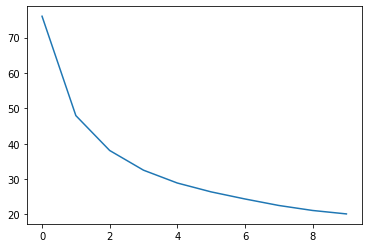

In [179]:
fig, ax = plt.subplots()
ax.plot(errors)

In [180]:
errors

[76.05136620505618,
 47.95615349209854,
 38.09461620301279,
 32.52570269465174,
 28.896937675878068,
 26.39253730621491,
 24.387247294607807,
 22.550451109254922,
 21.135397876383117,
 20.161507772080142]

In [181]:
forwards_cluster_data.groupby("cluster_8").size()

cluster_8
0    31
1    27
2     7
3    13
4    24
5    10
6    45
7    31
dtype: int64

In [182]:
errors = []
for i in range(1,100):
  kmeans = KMeans(n_clusters=8)
  kmeans.fit(X_scaled)
  errors.append(kmeans.inertia_)

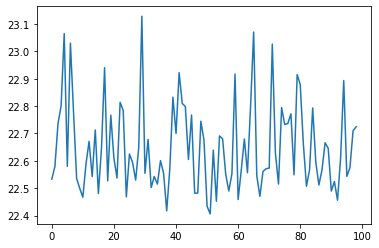

In [183]:
fig, ax = plt.subplots()
ax.plot(errors)

In [184]:
player_stats = player_stats.merge(forwards_cluster_data[["player","cluster_8"]], how='left', on="player")

In [185]:
player_stats.rename(columns = {"cluster_8":"fw_cluster"}, inplace=True)

In [186]:
player_stats[player_stats.fw_cluster == player_stats.loc[player_stats.player.str.contains("Kane"),"fw_cluster"].tolist()[0]].sort_values("goals_assists_pens_per90", ascending=False).head(20)

,player,nationality,position,squad,age,birth_year,games,games_starts,minutes,minutes_90s,goals,assists,non_penalty_goals,pens_made,pens_att,cards_yellow,cards_red,goals_per90,assists_per90,goals_assists_per90,goals_pens_per90,goals_assists_pens_per90,xg,npxg,xa,npxg_xa,xg_per90,xa_per90,xg_xa_per90,npxg_per90,npxg_xa_per90,shots_total,shots_on_target,shots_on_target_pct,shots_total_per90,shots_on_target_per90,goals_per_shot,goals_per_shot_on_target,distance_from_goal,shots_free_kicks,...,touches_def_3rd,touches_mid_3rd,touches_att_3rd,touches_att_pen_area,touches_live_ball,dribbles_completed,dribbles,dribbles_completed_pct,players_dribbled_past,nutmegs,carries,carry_distance,carry_progressive_distance,progressive_carries,carries_into_final_third,carries_into_penalty_area,miscontrols,dispossessed,pass_targets,passes_received,passes_received_pct,progressive_passes_received,sca,sca_per90,sca_passes_live,sca_passes_dead,sca_dribbles,sca_shots,sca_fouled,sca_og_for,gca,gca_per90,gca_passes_live,gca_passes_dead,gca_dribbles,gca_shots,gca_fouled,gca_og_for,League,fw_cluster
144,Harry Kane,eng ENG,FW,Tottenham,27.0,1993.0,35,35,3082,34.2,23,14,19,4,4,1,0,0.67,0.41,1.08,0.55,0.96,20.5,17.5,7.4,24.8,0.60,0.22,0.81,0.51,0.73,134,47,35.1,3.91,1.37,0.14,0.40,17.7,14.0,...,142.0,736.0,616.0,166.0,1341.0,46.0,79.0,58.2,47.0,8.0,897.0,4616.0,2537.0,150.0,53.0,26.0,61.0,71.0,1761.0,1055.0,59.9,223.0,113.0,3.30,70.0,2.0,18.0,9.0,12.0,2.0,25.0,0.73,15.0,1.0,6.0,0.0,3.0,0.0,Premier-League,5.0
1281,Karim Benzema,fr FRA,FW,Real Madrid,32.0,1987.0,34,33,2894,32.2,23,9,22,1,1,2,0,0.72,0.28,1.00,0.68,0.96,17.8,17.0,6.3,23.3,0.55,0.20,0.75,0.53,0.72,122,50,41.0,3.79,1.55,0.18,0.44,15.1,6.0,...,119.0,683.0,864.0,236.0,1507.0,39.0,60.0,65.0,40.0,5.0,1099.0,5738.0,3251.0,182.0,58.0,47.0,55.0,39.0,1882.0,1316.0,69.9,273.0,100.0,3.11,77.0,0.0,10.0,10.0,2.0,1.0,18.0,0.56,15.0,0.0,2.0,1.0,0.0,0.0,La-Liga,5.0
1187,Alexis Sánchez,cl CHI,FW,Inter,31.0,1988.0,30,12,1146,12.7,7,5,7,0,1,0,0,0.55,0.39,0.94,0.55,0.94,5.6,4.8,5.9,10.8,0.44,0.47,0.91,0.38,0.85,28,15,53.6,2.20,1.18,0.25,0.47,15.6,4.0,...,69.0,313.0,389.0,84.0,681.0,28.0,41.0,68.3,29.0,1.0,549.0,2668.0,1090.0,67.0,21.0,13.0,36.0,36.0,734.0,557.0,75.9,148.0,71.0,5.58,53.0,8.0,3.0,3.0,4.0,0.0,15.0,1.18,13.0,1.0,1.0,0.0,0.0,0.0,Serie-A,5.0
1086,Romelu Lukaku,be BEL,FW,Inter,27.0,1993.0,36,32,2884,32.0,24,11,18,6,6,4,0,0.75,0.34,1.09,0.56,0.90,22.7,18.1,7.8,25.9,0.71,0.24,0.95,0.57,0.81,89,42,47.2,2.78,1.31,0.20,0.43,13.7,1.0,...,65.0,512.0,668.0,239.0,1113.0,38.0,69.0,55.1,40.0,2.0,824.0,3785.0,2355.0,120.0,46.0,42.0,88.0,62.0,1569.0,934.0,59.5,387.0,114.0,3.56,88.0,0.0,12.0,10.0,4.0,0.0,24.0,0.75,20.0,0.0,2.0,2.0,0.0,0.0,Serie-A,5.0
420,Andy Delort,dz ALG,FW,Montpellier,28.0,1991.0,30,30,2482,27.6,15,9,15,0,1,4,0,0.54,0.33,0.87,0.54,0.87,10.8,10.0,5.9,15.9,0.39,0.21,0.60,0.36,0.58,91,34,37.4,3.30,1.23,0.16,0.44,16.0,2.0,...,85.0,544.0,655.0,159.0,1157.0,38.0,70.0,54.3,39.0,1.0,658.0,2751.0,1451.0,86.0,22.0,18.0,72.0,40.0,1526.0,928.0,60.8,248.0,102.0,3.70,72.0,4.0,9.0,9.0,8.0,0.0,15.0,0.54,12.0,0.0,1.0,1.0,1.0,0.0,Ligue-1,5.0
1247,Duván Zapata,co COL,FW,Atalanta,29.0,1991.0,37,29,2379,26.4,15,9,14,1,1,0,0,0.57,0.34,0.91,0.53,0.87,15.4,14.6,6.5,21.2,0.58,0.25,0.83,0.55,0.80,98,38,38.8,3.71,1.44,0.14,0.37,13.1,0.0,...,61.0,449.0,837.0,274.0,1225.0,40.0,91.0,44.0,47.0,2.0,990.0,4715.0,2414.0,149.0,36.0,54.0,108.0,93.0,1670.0,1043.0,62.5,402.0,99.0,3.75,76.0,0.0,6.0,10.0,7.0,0.0,16.0,0.61,14.0,0.0,0.0,0.0,2.0,0.0,Serie-A,5.0
1122,Álvaro Morata,es ESP,FW,Juventus,27.0,1992.0,32,23,2014,22.4,11,9,10,1,1,3,1,0.49,0.40,0.89,0.45,0.85,10.9,10.2,4.8,15.0,0.49,0.22,0.71,0.46,0.67,54,23,42.6,2.41,1.03,0.19,0.43,11.4,0.0,...,73.0,426.0,455.0,148.0,861.0,27.0,42.0,64.3,27.0,4.0,580.0,3022.0,1713.0,74.0,33.0,18.0,62.0,39.0,1057.0,688.0,65.1,228.0,74.0,3.31,56.0,0.0,4.0,6.0,6.0,2.0,15.0,0.67,12.0,0.0,0.0,2.0,1.0,0.0,Serie-A,5.0
481,Mauro Icardi,ar ARG,FW,Paris S-G,27.0,1993.0,20,11,1079,12.0,7,3,6,1,1,1,0,0.58,0.25,0.83,0